[View in Colaboratory](https://colab.research.google.com/github/Arvind2222/OCR_TF/blob/master/ocr_ANN.ipynb)

# Case Study MNIST Handwritten digits dataset
## Python 3

Case study for the handwritten digits recongition using tensorflow. 


In [1]:
import sys
print('Working'.format(sys.version_info[0]))

Working


## TensorFlow execution

Colaboratory allows you to execute TensorFlow code in your browser with a single click. The example below adds two matrices.

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

In [0]:
import tensorflow as tf
import numpy as np

with tf.Session():
  input1 = tf.constant(1.0, shape=[2, 3])
  input2 = tf.constant(np.reshape(np.arange(1.0, 7.0, dtype=np.float32), (2, 3)))
  output = tf.add(input1, input2)
  result = output.eval()

result

array([[2., 3., 4.],
       [5., 6., 7.]], dtype=float32)

## Visualization

Colaboratory includes widely used libraries like [matplotlib](https://matplotlib.org/), simplifying visualization.

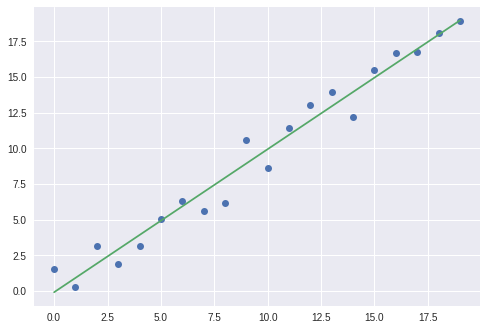

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

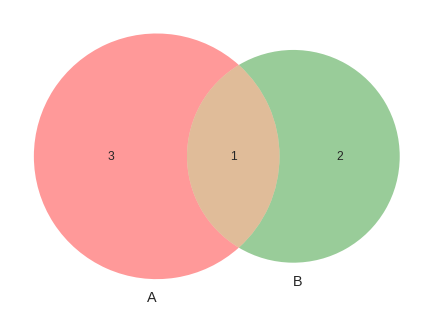

In [0]:
# Only needs to be run once at the top of the notebook.
!pip install -q matplotlib-venn

# Now the newly-installed library can be used anywhere else in the notebook.
from matplotlib_venn import venn2
_ = venn2(subsets = (3, 2, 1))

Want to use a new library?  `pip install` it. For recipes to import commonly used libraries, refer to the [importing libraries example notebook](/notebooks/snippets/importing_libraries.ipynb)

In [0]:
import os
import sys
import cv2
import numpy as np

In [0]:
#!pip install opencv-python


In [0]:
#!wget http://ai.stanford.edu/~btaskar/ocr/letter.data.gz  

--2018-07-03 03:46:59--  http://ai.stanford.edu/~btaskar/ocr/letter.data.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1329012 (1.3M) [application/x-gzip]
Saving to: ‘letter.data.gz’

letter.data.gz      100%[===================>]   1.27M  3.63MB/s    in 0.3s    

2018-07-03 03:46:59 (3.63 MB/s) - ‘letter.data.gz’ saved [1329012/1329012]



In [0]:
#!gunzip letter.data.gz

gzip: letter.data already exists; do you wish to overwrite (y or n)? ^C


In [0]:
#input file 
input_file = 'letter.data'

In [0]:
img_resize_factor = 12
start = 6
end = -1
height, width = 16, 8

In [0]:
with open(input_file, 'r') as f:
  for line in f.readlines():
    
    #reading data
    data = np.array([255 * float(x) for x in line.split('\t')[start:end]])

In [0]:
img =  np.reshape(data, (height, width)) 

In [0]:
img_scaled = cv2.resize(img, None, fx=img_resize_factor, fy=img_resize_factor) 

In [0]:
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
%matplotlib inline
image= mpimg.imread('Image',img_scaled)

# cv2.imshow('Image', img_scaled) 

TypeError: ignored

In [0]:
!ls


datalab  letter.data  letter.data.gz


In [0]:
import numpy as np 
import neurolab as nl 

ModuleNotFoundError: ignored

In [0]:
# !pip install neurolab

In [0]:
input_file = 'letter.data' 
num_datapoints = 50 
orig_labels = 'omandig' 


In [0]:
num_orig_labels = len(orig_labels) 
# Define the training and testing parameters 
num_train = int(0.9 * num_datapoints) 
num_test = num_datapoints - num_train

# Define the dataset extraction parameters  
start = 6 
end = -1 

# Creating the dataset 
data = [] 
labels = [] 


In [0]:
with open(input_file, 'r') as f: 
    for line in f.readlines(): 
        # Split the current line tabwise 
        list_vals = line.split('\t') 
        if list_vals[1] not in orig_labels: 
          #if the label is in our ground truth  
          continue
        # Extract the current label and append it  
        # to the main list 
        label = np.zeros((num_orig_labels, 1)) 
        label[orig_labels.index(list_vals[1])] = 1 
        labels.append(label)
        cur_char = np.array([float(x) for x in list_vals[start:end]]) 
        data.append(cur_char) 
        if len(data) >= num_datapoints: 
            break 

In [0]:
data = np.asfarray(data) 
labels = np.array(labels).reshape(num_datapoints, num_orig_labels) 

ValueError: ignored

# Tensor Flow based perceptron model

In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 

In [0]:
num_points = 1200 


In [0]:
data = [] 
m = 0.2 
c = 0.5 
for i in range(num_points):
  # Generate 'x'      
  x = np.random.normal(0.0, 0.8) 
  noise = np.random.normal(0.0, 0.04) 
  
  y = m*x + c + noise  
 
  data.append([x, y]) 

In [0]:
x_data = [d[0] for d in data] 
y_data = [d[1] for d in data] 

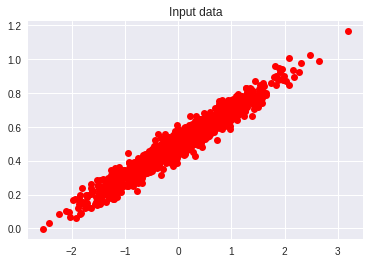

In [0]:
plt.plot(x_data, y_data, 'ro') 
plt.title('Input data') 
plt.show() 

In [0]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) 
b = tf.Variable(tf.zeros([1])) 

In [0]:
# Define equation for 'y' 
y = W * x_data + b 

In [0]:
# Define how to compute the loss 
loss = tf.reduce_mean(tf.square(y - y_data)) 

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.5) 
train = optimizer.minimize(loss) 

In [0]:
init = tf.initialize_all_variables() 

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [0]:
# Start the tensorflow session and run it 
sess = tf.Session() 
sess.run(init) 


ITERATION 1
W = 0.1968883
b = 0.49834573
loss = 0.0015677051


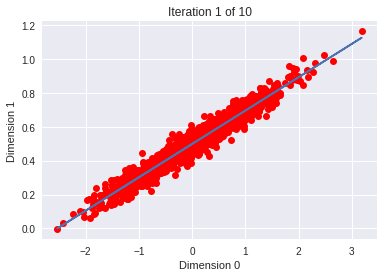


ITERATION 2
W = 0.19688736
b = 0.49834573
loss = 0.0015677051


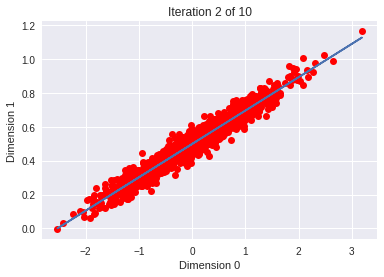


ITERATION 3
W = 0.19688706
b = 0.49834573
loss = 0.0015677053


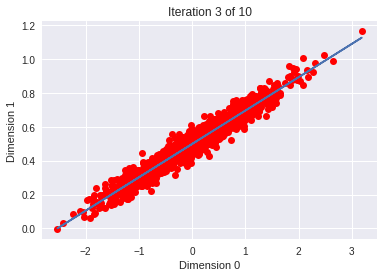


ITERATION 4
W = 0.19688697
b = 0.4983457
loss = 0.0015677053


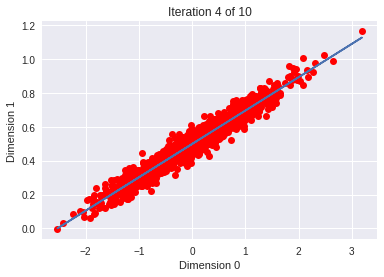


ITERATION 5
W = 0.19688694
b = 0.4983457
loss = 0.0015677052


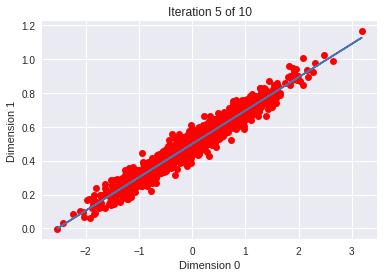


ITERATION 6
W = 0.19688693
b = 0.4983457
loss = 0.0015677053


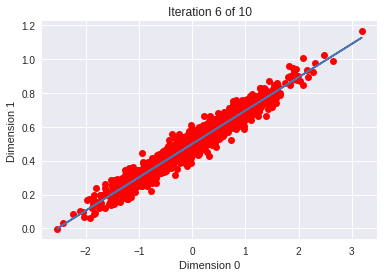


ITERATION 7
W = 0.19688693
b = 0.4983457
loss = 0.0015677053


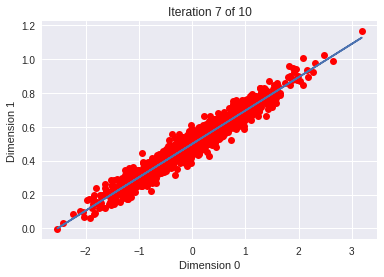


ITERATION 8
W = 0.19688693
b = 0.4983457
loss = 0.0015677053


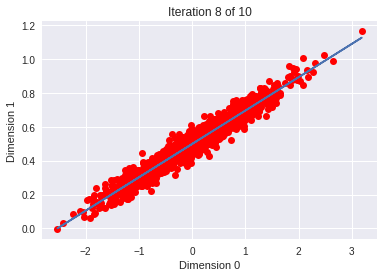


ITERATION 9
W = 0.19688693
b = 0.4983457
loss = 0.0015677053


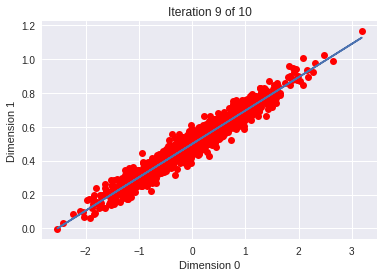


ITERATION 10
W = 0.19688693
b = 0.4983457
loss = 0.0015677053


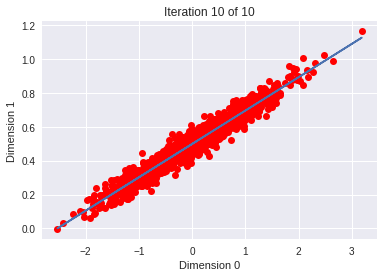

In [0]:
# Start iterating 
num_iterations = 10 
for step in range(num_iterations): 
    # Run the session 
    sess.run(train) 
    # Print the progress 
    print('\nITERATION', step+1) 
    print('W =', sess.run(W)[0]) 
    print('b =', sess.run(b)[0]) 
    print('loss =', sess.run(loss)) 
    # Plot the input data  
    plt.plot(x_data, y_data, 'ro') 

    # Plot the predicted output line 
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b)) 
    # Set plotting parameters 
    plt.xlabel('Dimension 0') 
    plt.ylabel('Dimension 1') 
    plt.title('Iteration ' + str(step+1) + ' of ' + str(num_iterations)) 
    plt.show() 